In [ ]:
'''
Open Points:
- How to deal with histogram data -> Currently each bin is seen as a feature
- Try different feature selection/reduction techniques
- Try different classification algorithms
- include unbalancedness of classes in algorithm
- Implement plotting of results as charts (http://scikit-learn.org/stable/modules/learning_curve.html)

'''

In [ ]:
import csv
import itertools
import pandas as pd
import numpy as np
import graphviz
import matplotlib.pyplot as plt

from IPython.display import display, HTML

from sklearn import tree
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import precision_score,classification_report,confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.externals import joblib


np.random.seed(1234)

#Data reaading parameter
TEST_PATH ='dataset/aps_failure_test_set.csv'
TRAIN_PATH ='dataset/aps_failure_training_set.csv'
COLUMNS = ['aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009', 'ah_000', 'ai_000', 'aj_000', 'ak_000', 'al_000', 'am_0', 'an_000', 'ao_000', 'ap_000', 'aq_000', 'ar_000', 'as_000', 'at_000', 'au_000', 'av_000', 'ax_000', 'ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009', 'az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009', 'ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009', 'bb_000', 'bc_000', 'bd_000', 'be_000', 'bf_000', 'bg_000', 'bh_000', 'bi_000', 'bj_000', 'bk_000', 'bl_000', 'bm_000', 'bn_000', 'bo_000', 'bp_000', 'bq_000', 'br_000', 'bs_000', 'bt_000', 'bu_000', 'bv_000', 'bx_000', 'by_000', 'bz_000', 'ca_000', 'cb_000', 'cc_000', 'cd_000', 'ce_000', 'cf_000', 'cg_000', 'ch_000', 'ci_000', 'cj_000', 'ck_000', 'cl_000', 'cm_000', 'cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009', 'co_000', 'cp_000', 'cq_000', 'cr_000', 'cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009', 'ct_000', 'cu_000', 'cv_000', 'cx_000', 'cy_000', 'cz_000', 'da_000', 'db_000', 'dc_000', 'dd_000', 'de_000', 'df_000', 'dg_000', 'dh_000', 'di_000', 'dj_000', 'dk_000', 'dl_000', 'dm_000', 'dn_000', 'do_000', 'dp_000', 'dq_000', 'dr_000', 'ds_000', 'dt_000', 'du_000', 'dv_000', 'dx_000', 'dy_000', 'dz_000', 'ea_000', 'eb_000', 'ec_00', 'ed_000', 'ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009', 'ef_000', 'eg_000']
SKIPROWS = 20
CLASS_NAMES = ['pos', 'neg']
AG = np.array(['ag_000', 'ag_001', 'ag_002', 'ag_003', 'ag_004', 'ag_005', 'ag_006', 'ag_007', 'ag_008', 'ag_009'])
AY = np.array(['ay_000', 'ay_001', 'ay_002', 'ay_003', 'ay_004', 'ay_005', 'ay_006', 'ay_007', 'ay_008', 'ay_009'])
AZ = np.array(['az_000', 'az_001', 'az_002', 'az_003', 'az_004', 'az_005', 'az_006', 'az_007', 'az_008', 'az_009'])
BA = np.array(['ba_000', 'ba_001', 'ba_002', 'ba_003', 'ba_004', 'ba_005', 'ba_006', 'ba_007', 'ba_008', 'ba_009'])
CN = np.array(['cn_000', 'cn_001', 'cn_002', 'cn_003', 'cn_004', 'cn_005', 'cn_006', 'cn_007', 'cn_008', 'cn_009'])
CS = np.array(['cs_000', 'cs_001', 'cs_002', 'cs_003', 'cs_004', 'cs_005', 'cs_006', 'cs_007', 'cs_008', 'cs_009'])
EE = np.array(['ee_000', 'ee_001', 'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009'])

def meanHistograms():
    # is a dataframe...\n",
    data_set = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
    ag_ = data_set[AG]
    ay_ = data_set[AY]
    az_ = data_set[AZ]
    ba_ = data_set[BA]
    cn_ = data_set[CN]
    cs_ = data_set[CS]
    ee_ = data_set[EE]
    
    # create new dataframe for each of the above with the mean\n",
    ag_mean = ag_.mean(axis=1, skipna=True)
    ay_mean = ay_.mean(axis=1, skipna=True)
    az_mean = az_.mean(axis=1, skipna=True)
    ba_mean = ba_.mean(axis=1, skipna=True)
    cn_mean = cn_.mean(axis=1, skipna=True)
    cs_mean = cs_.mean(axis=1, skipna=True)
    ee_mean = ee_.mean(axis=1, skipna=True)

    remaining_columns = np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.array(COLUMNS), AG), AY), AZ), BA), CN), CS), EE)
    remaining_data = data_set[remaining_columns]
    return pd.concat(
        [
            remaining_data,
            ag_mean.rename('ag_mean'),
            ay_mean.rename('ay_mean'),
            az_mean.rename('az_mean'),
            ba_mean.rename('ba_mean'),
            cn_mean.rename('cn_mean'),
            cs_mean.rename('cs_mean'),
            ee_mean.rename('ee_mean')
        ],
        axis=1
    )

def medianHistograms():
    # is a dataframe...\n",
    data_set = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
    ag_ = data_set[AG]
    ay_ = data_set[AY]
    az_ = data_set[AZ]
    ba_ = data_set[BA]
    cn_ = data_set[CN]
    cs_ = data_set[CS]
    ee_ = data_set[EE]
    
    # create new dataframe for each of the above with the median\n",
    ag_mean = ag_.median(axis=1, skipna=True)
    ay_mean = ay_.median(axis=1, skipna=True)
    az_mean = az_.median(axis=1, skipna=True)
    ba_mean = ba_.median(axis=1, skipna=True)
    cn_mean = cn_.median(axis=1, skipna=True)
    cs_mean = cs_.median(axis=1, skipna=True)
    ee_mean = ee_.median(axis=1, skipna=True)

    remaining_columns = np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.setdiff1d(np.array(COLUMNS), AG), AY), AZ), BA), CN), CS), EE)
    remaining_data = data_set[remaining_columns]
    return pd.concat(
        [
            remaining_data,
            ag_mean.rename('ag_median'),
            ay_mean.rename('ay_median'),
            az_mean.rename('az_median'),
            ba_mean.rename('ba_median'),
            cn_mean.rename('cn_median'),
            cs_mean.rename('cs_median'),
            ee_mean.rename('ee_median')
        ],
        axis=1
    )


#Data preprocessing parameter
NaNSTRATEGY = 'mean' #->'mean', 'median', 'most_frequent'


def loadDatasetWithPandas(path,skiprowsNum):
    #Reading the raw data from csv file
    rawData = pd.read_csv(path,skiprows=skiprowsNum)
    #display(rawData)  
    #replacing the string indicating missing values with the numpy value for missing values
    naNProcessedData = rawData.replace({'na': np.nan}, regex=True)
    return naNProcessedData
       
def processNaNInDataset(data, strategy):
    values = data[list(COLUMNS)].values
    imp = Imputer(missing_values='NaN', strategy=strategy, axis=0)
    imp = imp.fit(values)
    cleanedValues = imp.transform(values)
    label = data['class'].values
    return cleanedValues, label


#processing pipeline (http://scikit-learn.org/stable/modules/pipeline.html#pipeline)
def processingPipeline(featureReduction, featureSelector, classifier): 
    if(featureReduction == None):
        if(featureSelector == None):
            pipeline = make_pipeline(classifier)
        else:
            pipeline = make_pipeline(featureSelector,classifier)
    else:
        pipeline = make_pipeline(featureReduction, featureSelector,classifier)
    return pipeline


def findPipelineParameter(pipe):
    #http://scikit-learn.org/stable/modules/grid_search.html
    # search over whole parameter space of an estimator ->looks really interesting, but i dont´t have time right now to figure out how it works ;P
    None
    
def testPipeline(pipeline,folds, metric):
    #train
    pipeline.fit(cleanedTrainValues, labelTrain)
    #predict
    predictions = pip.predict(cleanedTestValues)
    #calculate cross validation according to given parameter
    print(cross_val_score(pip, cleanedTestValues, labelTest, cv=folds , scoring=metric))
    
    #evaluation
    evaluate(predictions)

    return pipeline


def evaluate(predictions):
    classificationRep = classification_report(labelTest, predictions)
    print(classificationRep)
    
    confusionMatrix = confusion_matrix(labelTest,predictions) 
    #print(confusionMatrix)
    np.set_printoptions(precision=2)
    #Code for plotting Confusion matrix
    #####################
    plt.figure()
    plot_confusion_matrix(confusionMatrix, classes=CLASS_NAMES,
                          title='Confusion matrix, without normalization')
    plt.figure()
    plot_confusion_matrix(confusionMatrix, classes=CLASS_NAMES, normalize=True,
                      title='Normalized confusion matrix')
    plt.show()
    #####################

    print('Score: ' + str(calculateOverallCostFromConfusionMatrix(confusionMatrix)))

def calculateOverallCostFromConfusionMatrix(confusionMatrix):
    #cost function from description
    score = confusionMatrix[0][1] * 500 + 10*confusionMatrix[1][1]
    return score

#example -> joblib.dump(clf, 'filename.pkl') 
def saveTrainedModel(model, path):
    joblib.dump(model, path)
    return

def loadTrainedModel(path):
    clf = joblib.load(path)
    return clf

#taken from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

In [2]:

#Data Loading and processing of NaN
####################################################################
#Load Train Dataset
trainData = loadDatasetWithPandas(TRAIN_PATH, SKIPROWS)
#Load Test Dataset
testData = loadDatasetWithPandas(TEST_PATH, SKIPROWS)

#TODO: Test which works best: "mean", "median”, or “most_frequent"
cleanedTrainValues, labelTrain = processNaNInDataset(trainData,NaNSTRATEGY)
cleanedTestValues, labelTest = processNaNInDataset(testData,NaNSTRATEGY)
#####################################################################

Number of Features: 50
[ 0.9859375  0.983125   0.985      0.984375   0.985    ]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.83      0.52      0.64       375

avg / total       0.98      0.99      0.98     16000

Confusion matrix, without normalization
[[15585    40]
 [  179   196]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.48  0.52]]


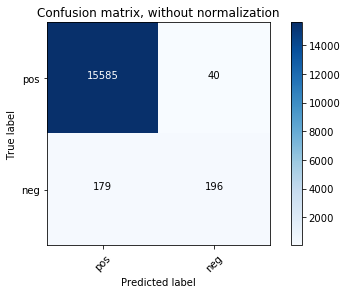

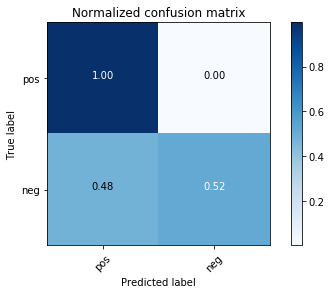

Score: 21960
Number of Features: 51
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.83      0.52      0.64       375

avg / total       0.98      0.99      0.98     16000

Confusion matrix, without normalization
[[15585    40]
 [  179   196]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.48  0.52]]


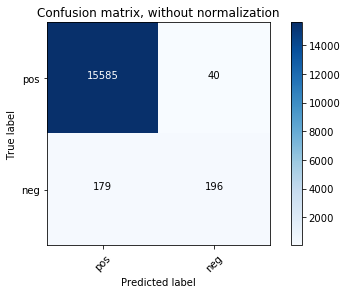

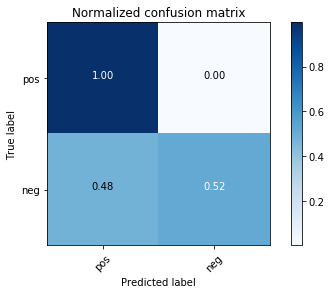

Score: 21960
Number of Features: 52
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


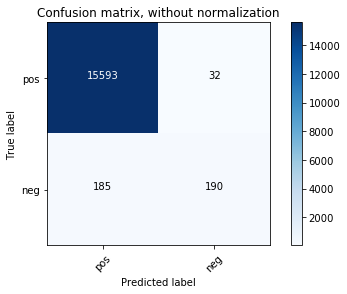

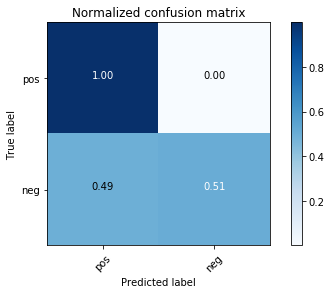

Score: 17900
Number of Features: 53
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


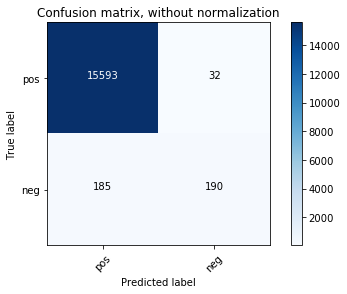

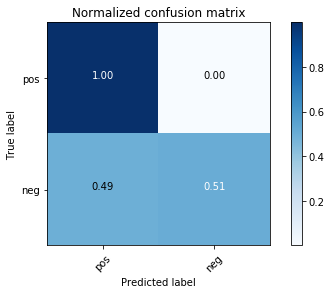

Score: 17900
Number of Features: 54
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


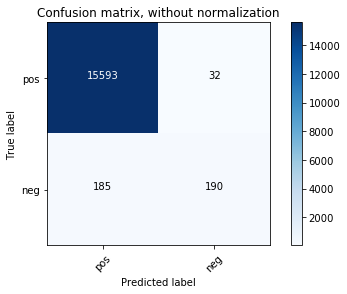

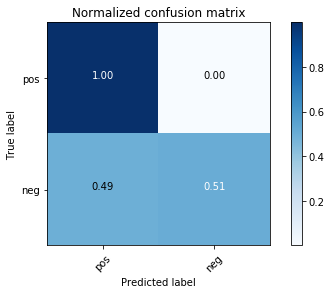

Score: 17900
Number of Features: 55
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


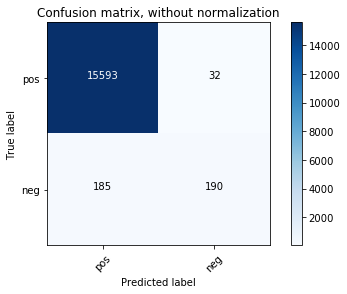

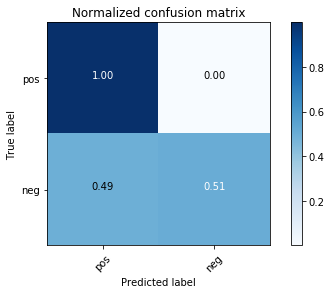

Score: 17900
Number of Features: 56
[ 0.99  0.99  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


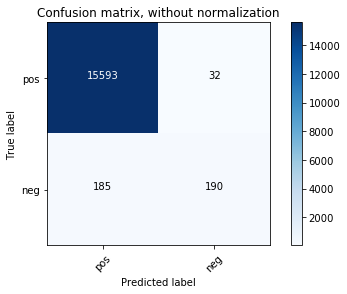

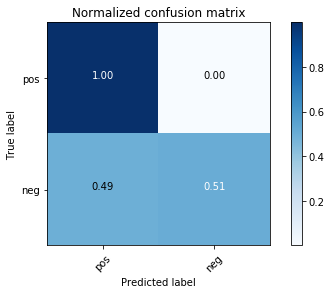

Score: 17900
Number of Features: 57
[ 0.99  0.98  0.98  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


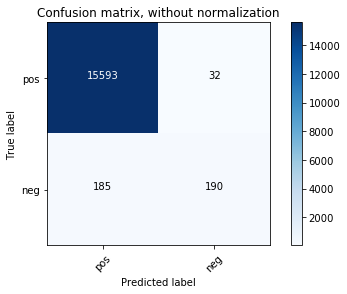

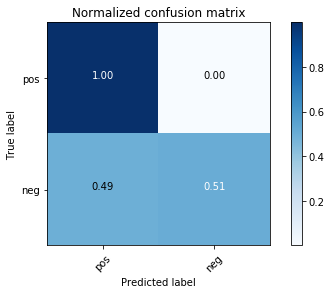

Score: 17900
Number of Features: 58
[ 0.99  0.99  0.98  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


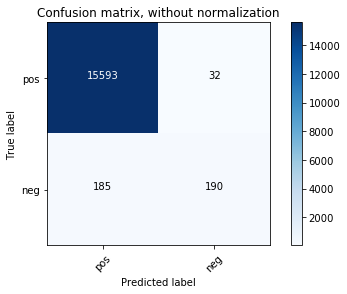

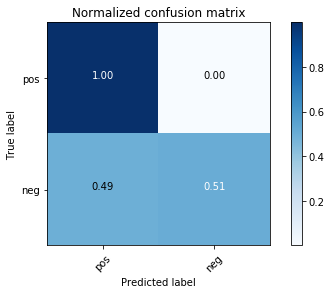

Score: 17900
Number of Features: 59
[ 0.99  0.98  0.98  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


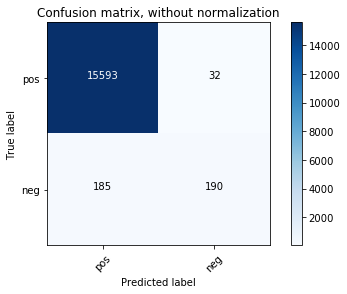

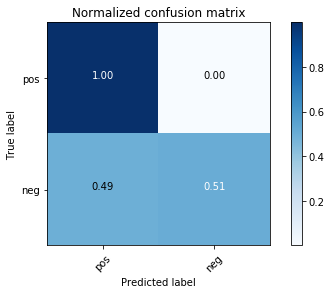

Score: 17900
Number of Features: 60
[ 0.99  0.98  0.98  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.86      0.51      0.64       375

avg / total       0.99      0.99      0.98     16000

Confusion matrix, without normalization
[[15593    32]
 [  185   190]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.49  0.51]]


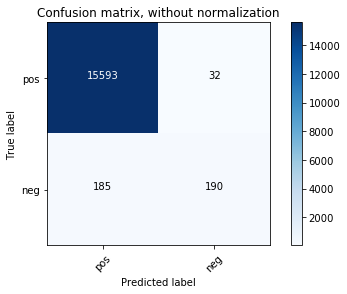

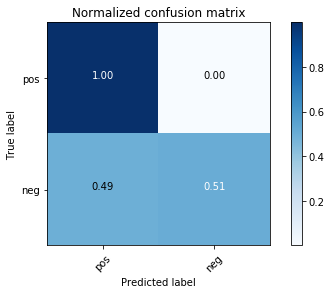

Score: 17900
Number of Features: 61
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


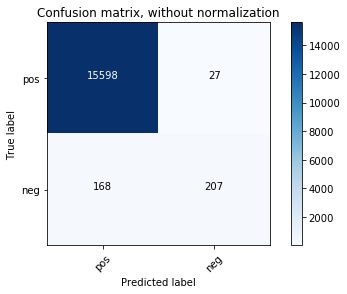

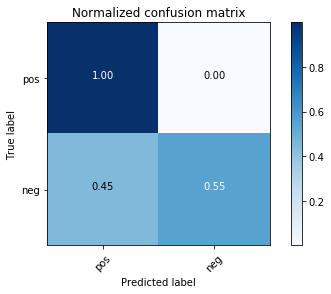

Score: 15570
Number of Features: 62
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


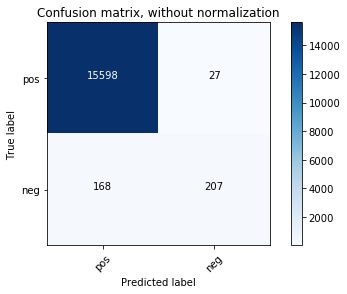

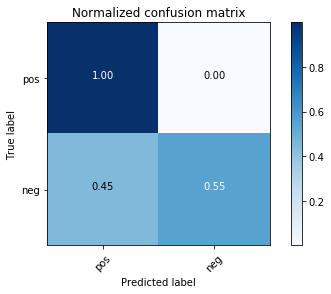

Score: 15570
Number of Features: 63
[ 0.99  0.98  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


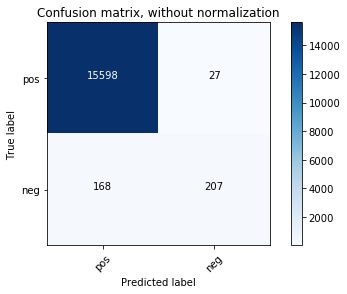

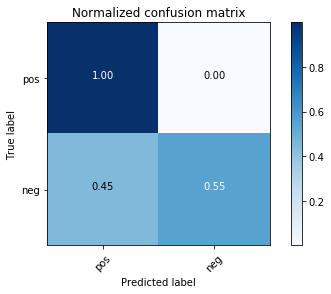

Score: 15570
Number of Features: 64
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


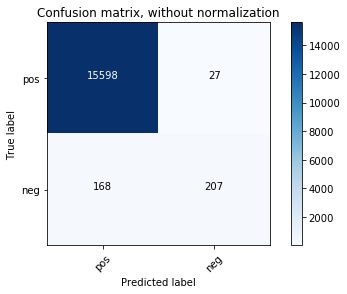

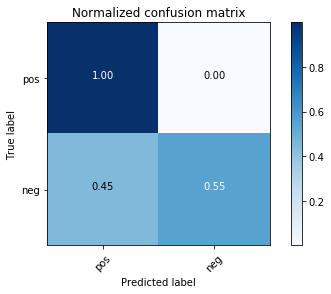

Score: 15570
Number of Features: 65
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


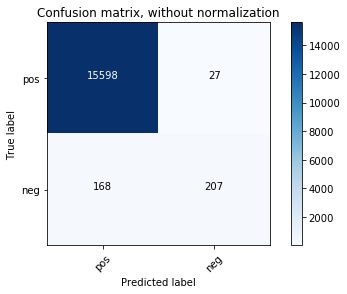

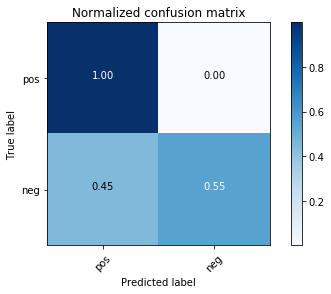

Score: 15570
Number of Features: 66
[ 0.99  0.98  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


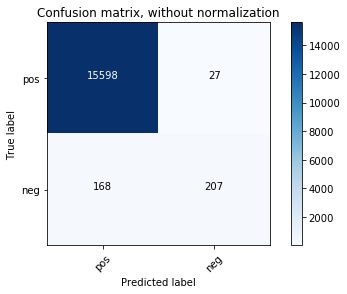

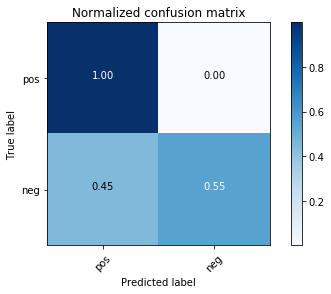

Score: 15570
Number of Features: 67
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


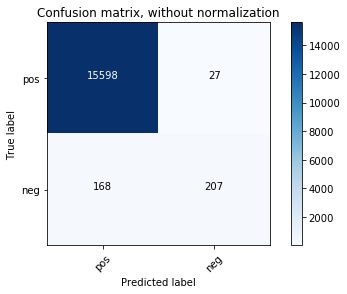

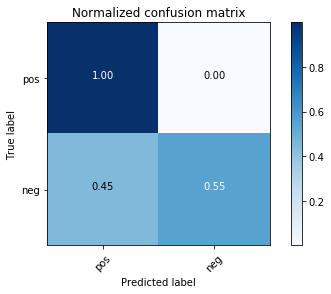

Score: 15570
Number of Features: 68
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


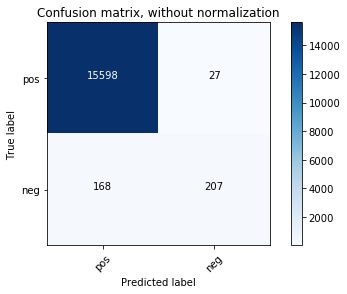

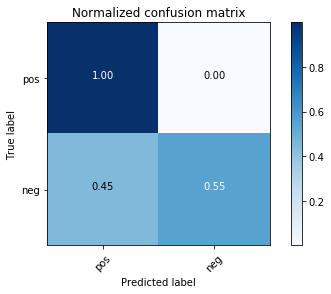

Score: 15570
Number of Features: 69
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


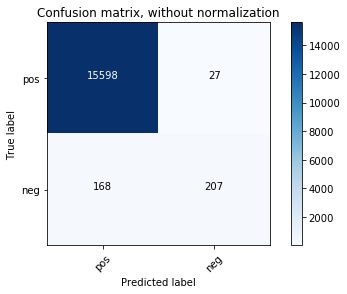

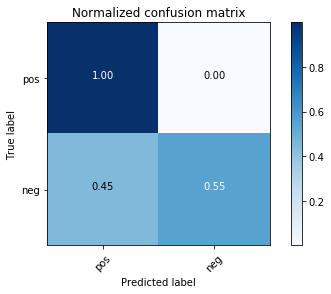

Score: 15570
Number of Features: 70
[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


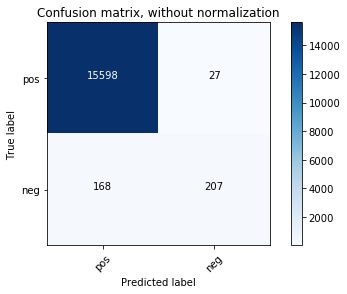

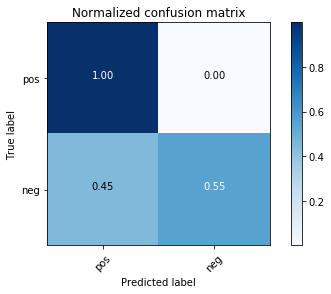

Score: 15570
Number of Features: 71
[ 0.99  0.98  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


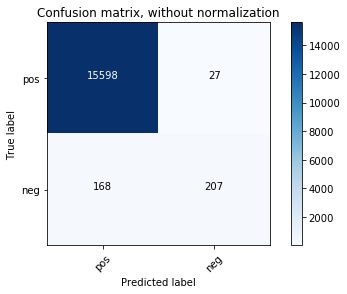

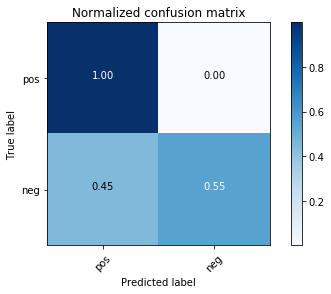

Score: 15570
Number of Features: 72
[ 0.99  0.98  0.99  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


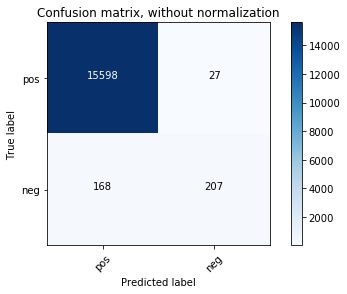

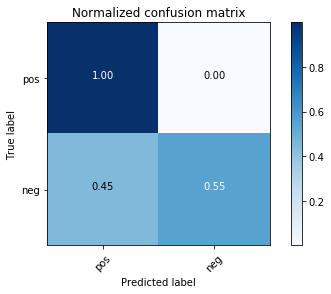

Score: 15570
Number of Features: 73
[ 0.99  0.99  0.99  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


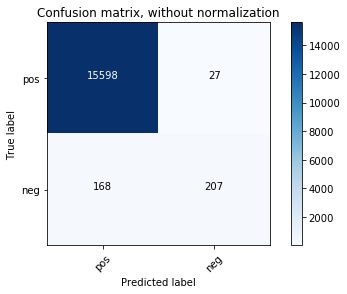

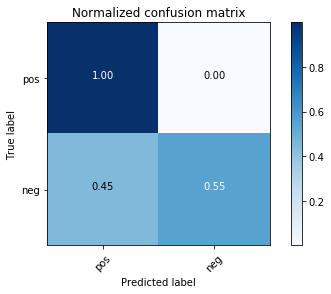

Score: 15570
Number of Features: 74
[ 0.99  0.99  0.99  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


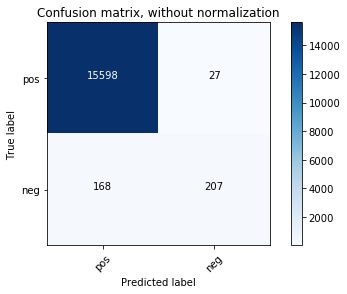

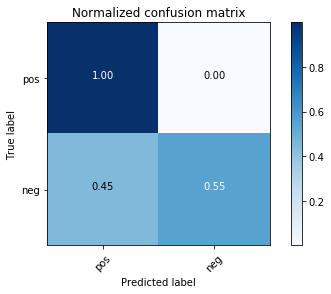

Score: 15570
Number of Features: 75
[ 0.99  0.99  0.99  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


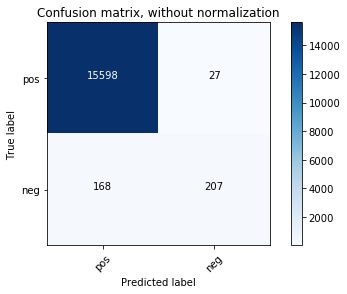

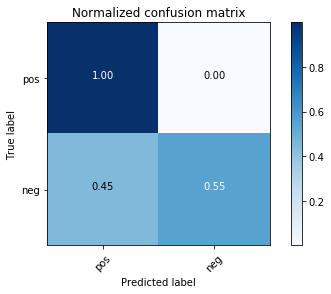

Score: 15570
Number of Features: 76
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


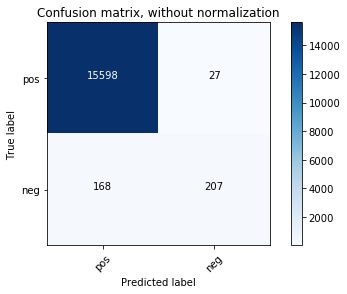

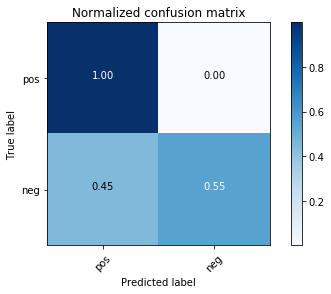

Score: 15570
Number of Features: 77
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


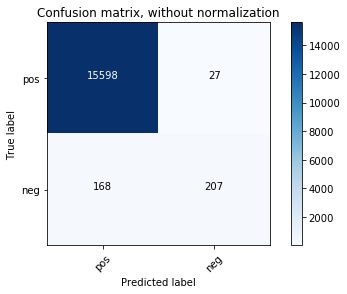

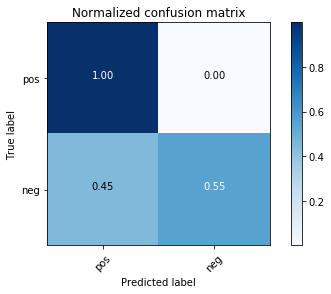

Score: 15570
Number of Features: 78
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


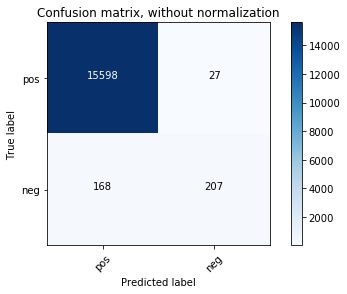

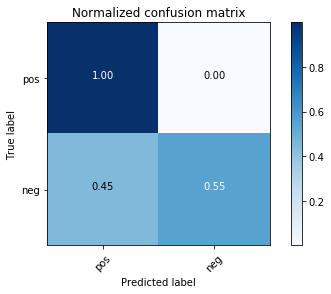

Score: 15570
Number of Features: 79
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


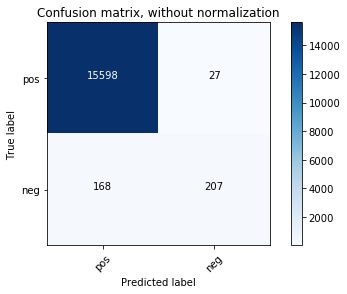

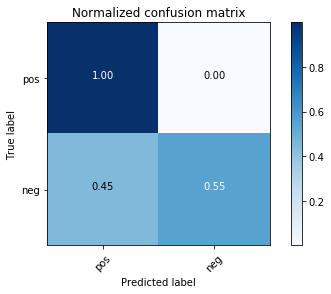

Score: 15570
Number of Features: 80
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


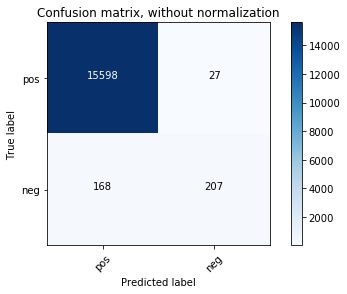

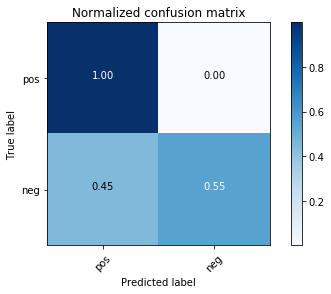

Score: 15570
Number of Features: 81
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


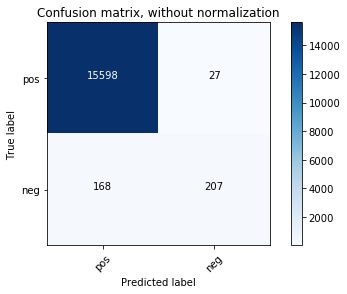

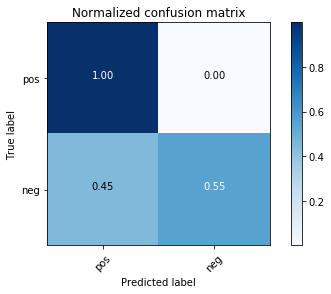

Score: 15570
Number of Features: 82
[ 0.99  0.99  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


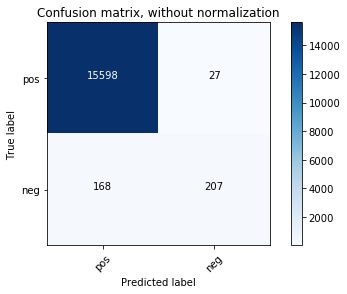

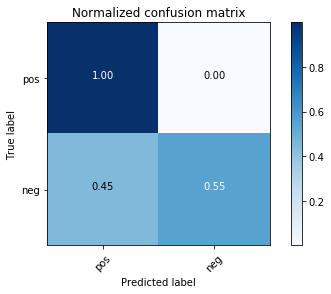

Score: 15570
Number of Features: 83
[ 0.99  0.99  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15598    27]
 [  168   207]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


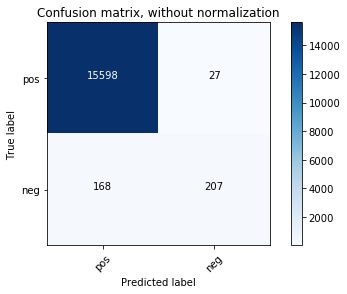

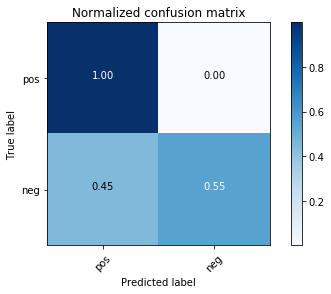

Score: 15570
Number of Features: 84
[ 0.99  0.99  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.88      0.55      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15596    29]
 [  170   205]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


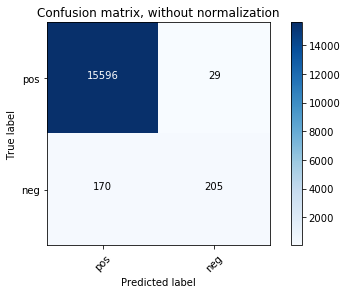

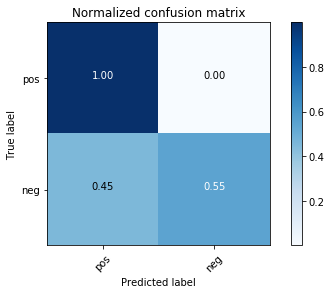

Score: 16550
Number of Features: 85
[ 0.99  0.99  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


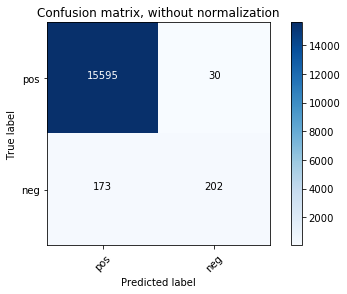

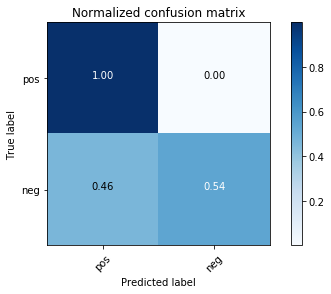

Score: 17020
Number of Features: 86
[ 0.99  0.99  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


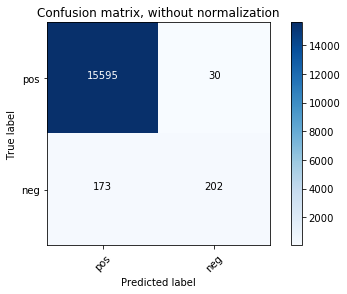

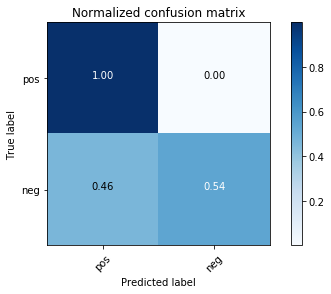

Score: 17020
Number of Features: 87
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


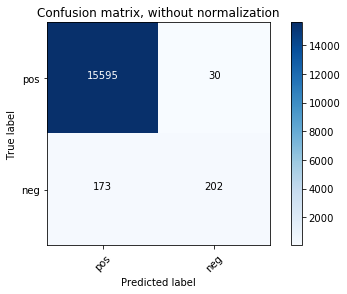

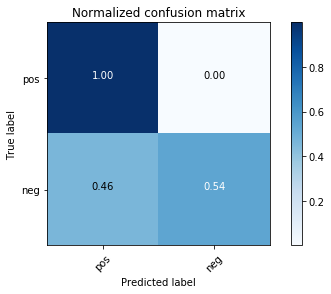

Score: 17020
Number of Features: 88
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


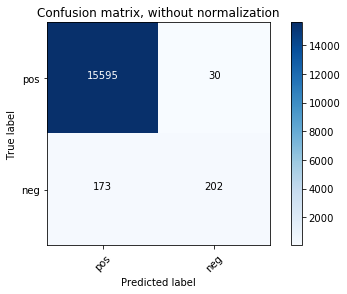

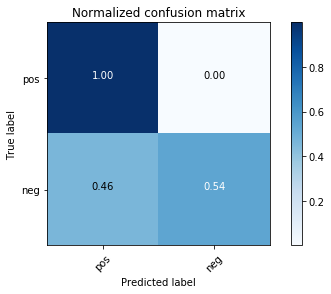

Score: 17020
Number of Features: 89
[ 0.99  0.99  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


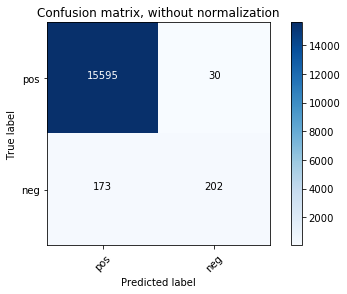

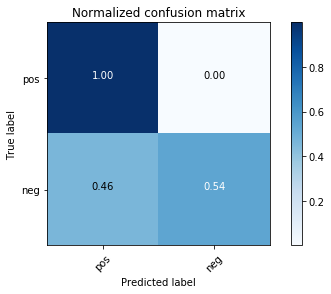

Score: 17020
Number of Features: 90
[ 0.99  0.98  0.99  0.98  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


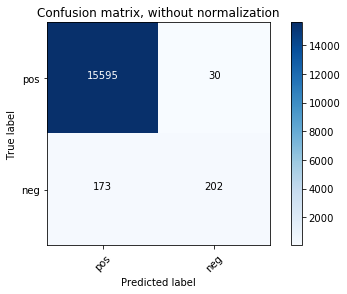

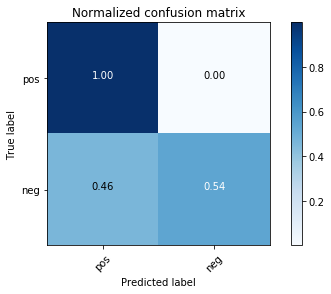

Score: 17020
Number of Features: 91
[ 0.99  0.98  0.99  0.98  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


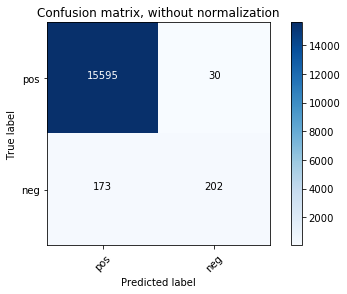

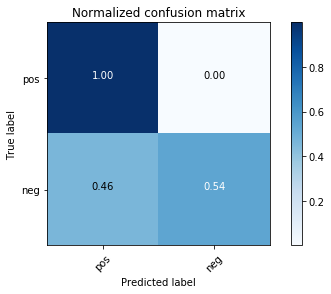

Score: 17020
Number of Features: 92
[ 0.99  0.98  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


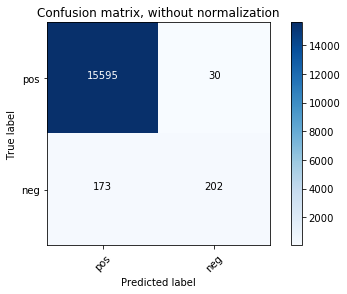

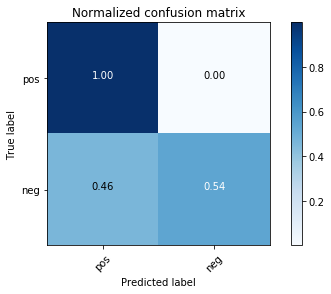

Score: 17020
Number of Features: 93
[ 0.99  0.98  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


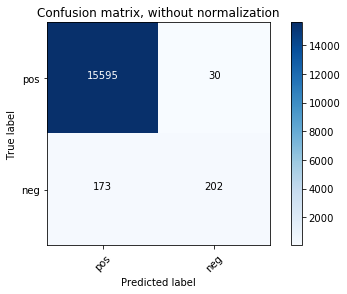

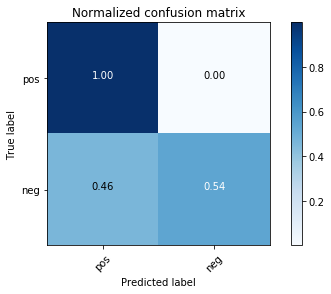

Score: 17020
Number of Features: 94
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.54      0.67       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15595    30]
 [  173   202]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.46  0.54]]


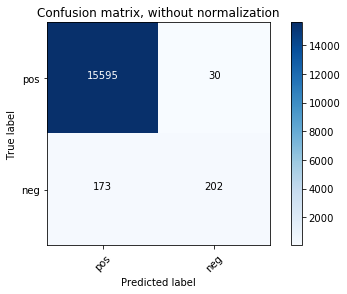

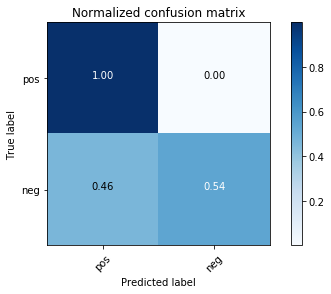

Score: 17020
Number of Features: 95
[ 0.99  0.98  0.98  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15594    31]
 [  167   208]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


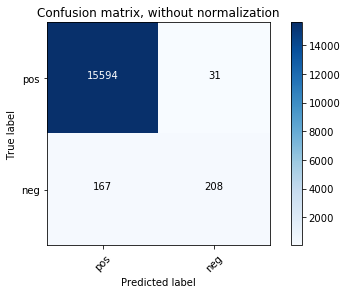

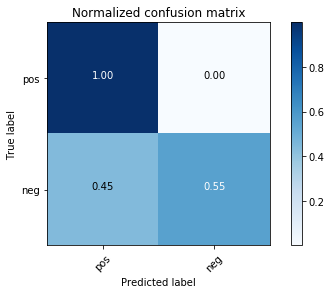

Score: 17580
Number of Features: 96
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15594    31]
 [  167   208]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


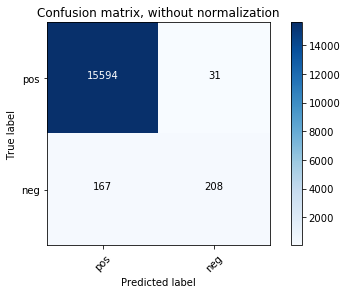

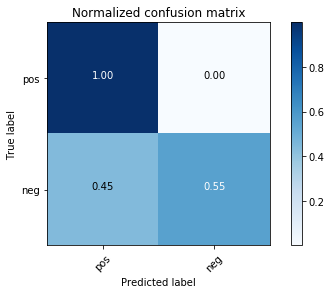

Score: 17580
Number of Features: 97
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15594    31]
 [  167   208]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


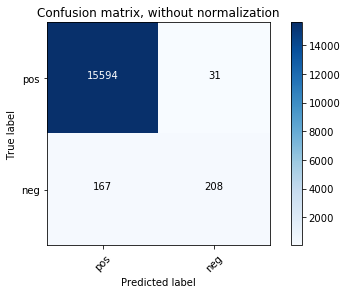

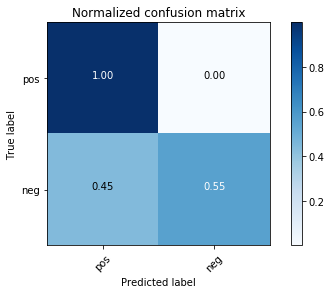

Score: 17580
Number of Features: 98
[ 0.99  0.98  0.98  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15594    31]
 [  167   208]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


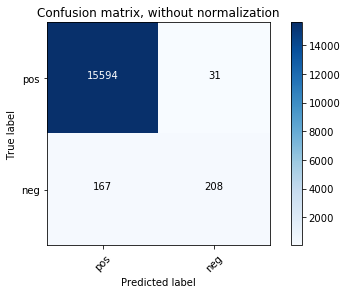

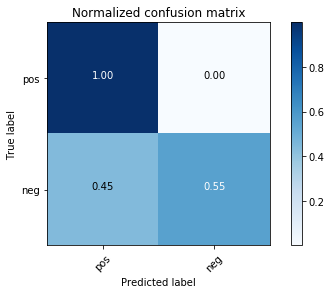

Score: 17580
Number of Features: 99
[ 0.99  0.98  0.98  0.99  0.98]
             precision    recall  f1-score   support

        neg       0.99      1.00      0.99     15625
        pos       0.87      0.55      0.68       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15594    31]
 [  167   208]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.45  0.55]]


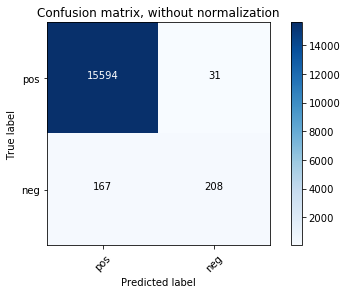

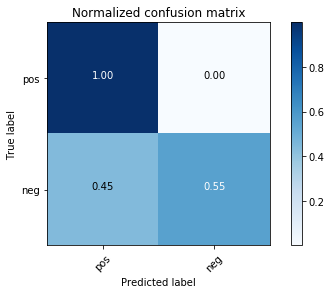

Score: 17580


In [3]:
#Decision Tree classifier
#####################################################################

#Tree parameter
max_depth = 5
min_samples_leaf = 20
#min_samples_split =
#class_weight ={0:.1, 1:.9}

    
decisiontree = tree.DecisionTreeClassifier(max_depth =max_depth, min_samples_leaf =min_samples_leaf)
#Feature Selector
for i in range(50,100):
    print('Number of Features: ' + str(i))
    featuresSelected = SelectKBest(chi2, k=i)
    #feature reduction

    #build pipelinee
    pip = processingPipeline(None, featuresSelected,decisiontree)
    
    #evaluate pipeline
    ##################################
    #http://scikit-learn.org/stable/modules/model_evaluation.html -> available metrics
    trainedPipe = testPipeline(pip,5,'accuracy')
    

#For generating the DT pdf later on
#dot_data = tree.export_graphviz(clf, out_file=None) 
#graph = graphviz.Source(dot_data) 
#graph.render("DT")

[ 0.99  0.99  0.99  0.99  0.99]
             precision    recall  f1-score   support

        neg       0.99      1.00      1.00     15625
        pos       0.94      0.71      0.81       375

avg / total       0.99      0.99      0.99     16000

Confusion matrix, without normalization
[[15608    17]
 [  109   266]]
Normalized confusion matrix
[[ 1.    0.  ]
 [ 0.29  0.71]]


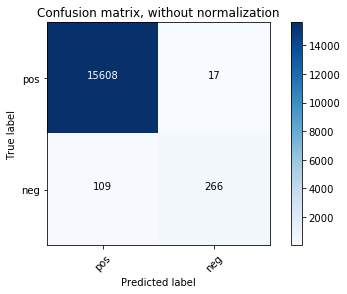

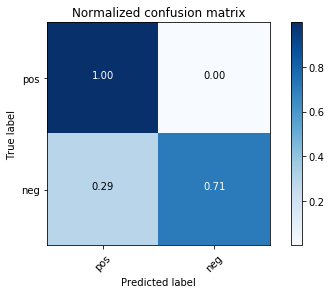

Score: 11160


In [4]:
#Random Forest Classifier
#-> Not reproducible results!!!!!
from sklearn.ensemble import RandomForestClassifier
for  g in range(0,1):
    randomfo = RandomForestClassifier(n_estimators=50)
    #build pipelinee
    pip = processingPipeline(None, None,randomfo)
    #evaluate pipeline
    trainedPip = testPipeline(pip,5,'accuracy')
    
saveTrainedModel(trainedPip, 'test.pkl')

In [ ]:
#Implement SVM's

In [5]:
#Example of loading a trained model
pip  = loadTrainedModel('test.pkl')
testPipeline(pip)

TypeError: testPipeline() missing 2 required positional arguments: 'folds' and 'metric'